Прежде чем запускать следующее, нужно пройти VK-авторизацию!

In [3]:
%%javascript
var kernel = IPython.notebook.kernel;
var command = "currentUrl = " + "'" + window.location + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [4]:
from urlparse import urlparse

r = urlparse(currentUrl)
code = r.query[5:]

url = ("https://oauth.vk.com/access_token"
       "?client_id=5429181" 
       "&client_secret=uAZqxwa2hgjLa4KLvbTG"
       "&code=" + code +
       "&redirect_uri="  + r.scheme + "://" + r.netloc + r.path)

In [6]:
import json
import urllib2   

data = json.load(urllib2.urlopen(url))
accessToken = data['access_token']

# Достаем участников группы

In [31]:
from urllib import urlencode
import time

groups = ["109490789", 
          "2100831", 
          "11912933", 
          "1167943", 
          "15335079", 
          "12813079", 
          "68478644",
          "16vzvoduvo",
          "59565067",
          "61511779",
          "1182973",
          "1119648",
          "21754234",
          "14294712",
          "7591998",
          "8702762",
          "23386497",
          "1566321",
          "55523638"]

users = []

for group in groups:
    params = {"group_id": group, 
              "count": 200, 
              "fields": "sex,education",
              "access_token": accessToken}
    params = urlencode(params)

    url = "https://api.vk.com/method/groups.getMembers?" + params
    data = json.load(urllib2.urlopen(url))
    data_users = data['response']['users']
    
    print("extracted %d users from %s" % (len(data_users), group))
    users.extend(data_users)
    time.sleep(1)
    
print("sum: %d" % len(users))

extracted 26 users from 109490789
extracted 200 users from 2100831
extracted 51 users from 11912933
extracted 104 users from 1167943
extracted 41 users from 15335079
extracted 31 users from 12813079
extracted 17 users from 68478644
extracted 13 users from 16vzvoduvo
extracted 97 users from 59565067
extracted 30 users from 61511779
extracted 200 users from 1182973
extracted 200 users from 1119648
extracted 91 users from 21754234
extracted 8 users from 14294712
extracted 35 users from 7591998
extracted 34 users from 8702762
extracted 2 users from 23386497
extracted 86 users from 1566321
extracted 44 users from 55523638
sum: 1310


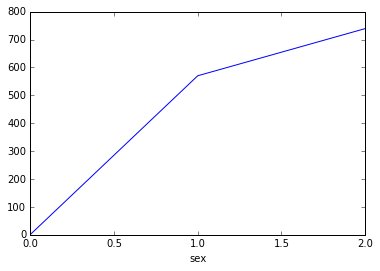

In [34]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

from collections import defaultdict

res = defaultdict(list)

for user in data['response']['users']: 
    res[user.get('university_name', "")].append(user)
    
df = pd.DataFrame(users)
df = df.groupby('sex').size()
df.plot()